# Digit zero data example
This is an example that illustrates how to synthesize data with `arfpy`.
Each image in the data set is a 8x8 pixel representation of digit zero.

In [50]:
from sklearn.datasets import load_digits
from arfpy import arf
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from numpy import random
random.seed(seed=2023)

First, we load the data:

In [51]:
df = load_digits(n_class=1) # zero digits
df= df.images.reshape((len(df.images), -1))
df = pd.DataFrame(df).astype('category') # set type from float to category to avoid floats in synthetic data

Now we can define the ARF object and estimate the density

In [52]:
my_arf = arf.arf(x = df)
FORDE = my_arf.forde()

Initial accuracy is 0.7471910112359551
Iteration number 1 reached accuracy of 0.449438202247191.


Finally, we can generate some new data:

In [53]:
df_syn = my_arf.forge(n = 4)

Let's plot some generated digits and compare them to the original mnist digits!


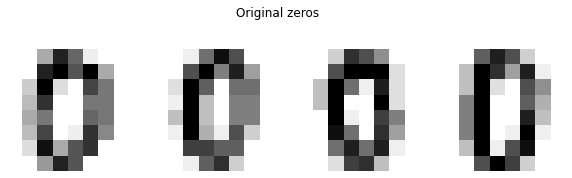

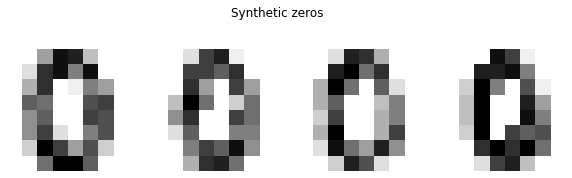

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, df):
    ax.set_axis_off()
    image = df.iloc[image,].to_numpy().reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
fig.suptitle("Original zeros")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
fig.suptitle("Synthetic zeros")
for ax, image in zip(axes, df_syn):
    ax.set_axis_off()
    image = df_syn.iloc[image,].to_numpy().reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
